In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
#월별 
"""
years = range(2019,2022)
months= range(1,13)

close_period_list=[]

#국민연금 가입 사업장 데이터를 불러오기 위한 디렉토리 리스트 생성
for year in years:
    for month in months:
        path="./국민연금 가입 사업장 내역 {0}년 {1}월.csv".format(year, month)
        close_period_list.append(path)
        
close_period_list=close_period_list[6:]
"""

In [6]:
#소상공인 기준 #2020년 4월 이전 기준

#국민연금 가입 사업장 데이터 불러오기
test0=pd.read_csv("./국민연금 가입 사업장 내역 2020년 3월.csv", encoding='CP949')

#탈퇴한 사업장 보기
test0=test0[test0['사업장가입상태코드 1:등록2:탈퇴 WKPL_JNNG_STCD VARCHAR(1)']>1]
#test0

#사용할 열만 추출
want_columns=test0.iloc[:,[1,9, 13,18]]

#각 업종코드별 분류를 통해 사업장 수 파악하기

#업종 분류별 빈 딕셔너리 생성
sosang_job_dict = {'1차 산업':0, '제조업':0, '자원':0, '건설업':0, '도매 및 소매업':0, '숙박 및 음식점':0, '운수 및 창고업, 임대':0, '서비스업':0, '부동산업':0, '정보통신업':0, '달리 분류되지 않은 개인 서비스업':0}


#인덱스(업종) 별 사업장 개수
for i in range(want_columns.count()[0]):
    #업종코드가 없는것이 있으므로 try처리
    try:
            #광업 외 1차 산업 5인미만 1
        if int(want_columns.iloc[i][2]) in range(11000,101000) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5 :
            sosang_job_dict['1차산업']+=1     
            #광업 10인미만
        elif int(want_columns.iloc[i][2]) in range(101000,143107) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<10:
            sosang_job_dict['1차산업']+=1          
            #광업 외 1차 산업 5인미만 2
        elif int(want_columns.iloc[i][2]) in range(143107, 151104) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5: 
            sosang_job_dict['1차산업']+=1          
            #제조업은 10인 미만
        elif int(want_columns.iloc[i][2]) in range(151104,369909) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<10:
            sosang_job_dict['제조업']+=1           
            #자원은 5인 미만
        elif int(want_columns.iloc[i][2]) in range(371000,410001) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['자원']+=1          
            #건설업은 10인 미만
        elif int(want_columns.iloc[i][2]) in range(451101,453001) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<10:   
            sosang_job_dict['건설업']+=1                        
            #도매 및 소매업은 5인 미만
        elif int(want_columns.iloc[i][2]) in range(501101,525913) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['도매 및 소매업']+=1              
            #숙박 및 음식점은 5인 미만
        elif int(want_columns.iloc[i][2]) in range(551001,552310) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['숙박 및 음식점']+=1             
            #운수업은 10인 미만 1
        elif int(want_columns.iloc[i][2]) in range(601000,630102) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<10:
            sosang_job_dict['운수 및 창고업, 임대']+=1                
            #운수업을 제외한 창고업 및 임대는 5인 미만 1            
        elif int(want_columns.iloc[i][2]) in range(601000,630903) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['운수 및 창고업, 임대']+=1         
            #서비스업은 5인 미만             
        elif int(want_columns.iloc[i][2]) in range(630903,672002) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['서비스업']+=1 
            #부동산업은 5인 미만             
        elif int(want_columns.iloc[i][2]) in range(701101,703025) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['부동산업']+=1            
            #운수업을 제외한 창고업 및 임대는 5인 미만 2               
        elif int(want_columns.iloc[i][2]) in range(711100,713007) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['운수 및 창고업, 임대']+=1 
            #정보통신업은 5인 미만
        elif int(want_columns.iloc[i][2]) in range(721000,729001) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['정보통신업']+=1            
            #서비스업은 5인 미만
        elif int(want_columns.iloc[i][2]) in range(741101,930922) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['서비스업']+=1          
            #달리 분류되지 않은 개인 서비스업은 5인 미만
        elif int(want_columns.iloc[i][2]) in range(930925,950003) and want_columns.iloc[i]['가입자수 JNNGP_CNT INTEGER']<5:
            sosang_job_dict['달리 분류되지 않은 개인 서비스업']+=1  
            #미존재 사업장
        elif int(want_columns.iloc[i][2]) == 999999:
            continue
    except:
        continue

sosang_job_dict

C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'1차 산업': 0,
 '제조업': 1878,
 '자원': 63,
 '건설업': 20432,
 '도매 및 소매업': 1594,
 '숙박 및 음식점': 329,
 '운수 및 창고업, 임대': 274,
 '서비스업': 1505,
 '부동산업': 905,
 '정보통신업': 318,
 '달리 분류되지 않은 개인 서비스업': 32}

In [4]:
#소상공인 기준 #2020년 3월 이후 기준

import pandas as pd
import numpy as np
import matplotlib as plt

#국민연금 가입 사업장 데이터 불러오기
test0=pd.read_csv("./국민연금 가입 사업장 내역 2021년 4월.csv", encoding='CP949')

#탈퇴한 사업장 보기
test0=test0[test0[' 사업장가입상태코드 1:등록2:탈퇴']>1]
#test0

#사용할 열만 추출
want_columns=test0.iloc[:,[1,9, 13,18]]
#want_columns
 
#각 업종코드별 분류를 통해 사업장 수 파악하기

#업종 분류별 빈 딕셔너리 생성
sosang_job_dict = {'1차 산업':0, '제조업':0, '자원':0, '건설업':0, '도매 및 소매업':0, '숙박 및 음식점':0, '운수 및 창고업, 임대':0, '서비스업':0, '부동산업':0, '정보통신업':0, '달리 분류되지 않은 개인 서비스업':0}

 

for i in range(want_columns.count()[0]):
    #업종코드가 없는것이 있으므로 try처리

    try:
        #광업 외 1차 산업 5인미만 1
        if int(want_columns.iloc[i][2]) in range(11000,101000) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5 :
            sosang_job_dict['1차 산업']+=1     

        #광업 10인미만

        elif int(want_columns.iloc[i][2]) in range(101000,143107) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:

            sosang_job_dict['1차 산업']+=1          

            #광업 외 1차 산업 5인미만 2

        elif int(want_columns.iloc[i][2]) in range(143107, 151104) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5: 

            sosang_job_dict['1차 산업']+=1          

            #제조업은 10인 미만

        elif int(want_columns.iloc[i][2]) in range(151104,369909) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:

            sosang_job_dict['제조업']+=1           

            #자원은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(371000,410001) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['자원']+=1          

            #건설업은 10인 미만

        elif int(want_columns.iloc[i][2]) in range(451101,453001) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:   

            sosang_job_dict['건설업']+=1                        

            #도매 및 소매업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(501101,525913) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['도매 및 소매업']+=1              

            #숙박 및 음식점은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(551001,552310) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['숙박 및 음식점']+=1             

            #운수업은 10인 미만 1

        elif int(want_columns.iloc[i][2]) in range(601000,630102) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:

            sosang_job_dict['운수 및 창고업, 임대']+=1                

            #운수업을 제외한 창고업 및 임대는 5인 미만 1            

        elif int(want_columns.iloc[i][2]) in range(601000,630903) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['운수 및 창고업, 임대']+=1         

            #서비스업은 5인 미만             

        elif int(want_columns.iloc[i][2]) in range(630903,672002) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['서비스업']+=1 

            #부동산업은 5인 미만             

        elif int(want_columns.iloc[i][2]) in range(701101,703025) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['부동산업']+=1            

            #운수업을 제외한 창고업 및 임대는 5인 미만 2               

        elif int(want_columns.iloc[i][2]) in range(711100,713007) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['운수 및 창고업, 임대']+=1 

            #정보통신업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(721000,729001) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['정보통신업']+=1            

            #서비스업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(741101,930922) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['서비스업']+=1          

            #달리 분류되지 않은 개인 서비스업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(930925,950003) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['달리 분류되지 않은 개인 서비스업']+=1  

            #미존재 사업장

        elif int(want_columns.iloc[i][2]) == 999999:

            continue

    except:

        continue

 
sosang_job_dict

C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'1차 산업': 149,
 '제조업': 1429,
 '자원': 48,
 '건설업': 13002,
 '도매 및 소매업': 1297,
 '숙박 및 음식점': 239,
 '운수 및 창고업, 임대': 219,
 '서비스업': 1120,
 '부동산업': 812,
 '정보통신업': 242,
 '달리 분류되지 않은 개인 서비스업': 40}

In [5]:
#2021년 6월 이후 기준
import pandas as pd
import numpy as np
import matplotlib as plt

#국민연금 가입 사업장 데이터 불러오기
test0=pd.read_csv("./국민연금 가입 사업장 내역 2021년 7월.csv", encoding='CP949')

#탈퇴한 사업장 보기
test0=test0[test0[' 사업장가입상태코드 1 등록 2 탈퇴']>1]
#test0

#사용할 열만 추출
want_columns=test0.iloc[:,[1,9, 13,18]]
#want_columns

#2020년 3월까지

#소상공인 기준 #2020년 4월 이전 기준

 

#각 업종코드별 분류를 통해 사업장 수 파악하기

 

#업종 분류별 빈 딕셔너리 생성


#소상공인 기준 폐업자 수

sosang_job_dict = {'1차 산업':0, '제조업':0, '자원':0, '건설업':0, '도매 및 소매업':0, '숙박 및 음식점':0, '운수 및 창고업, 임대':0, '서비스업':0, '부동산업':0, '정보통신업':0, '달리 분류되지 않은 개인 서비스업':0}

 

for i in range(want_columns.count()[0]):
    #업종코드가 없는것이 있으므로 try처리

    try:

        #광업 외 1차 산업 5인미만 1

        if int(want_columns.iloc[i][2]) in range(11000,101000) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5 :

            sosang_job_dict['1차 산업']+=1     

        #광업 10인미만

        elif int(want_columns.iloc[i][2]) in range(101000,143107) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:

            sosang_job_dict['1차 산업']+=1          

            #광업 외 1차 산업 5인미만 2

        elif int(want_columns.iloc[i][2]) in range(143107, 151104) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5: 

            sosang_job_dict['1차 산업']+=1          

            #제조업은 10인 미만

        elif int(want_columns.iloc[i][2]) in range(151104,369909) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:

            sosang_job_dict['제조업']+=1           

            #자원은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(371000,410001) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['자원']+=1          

            #건설업은 10인 미만

        elif int(want_columns.iloc[i][2]) in range(451101,453001) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:   

            sosang_job_dict['건설업']+=1                        

            #도매 및 소매업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(501101,525913) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['도매 및 소매업']+=1              

            #숙박 및 음식점은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(551001,552310) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['숙박 및 음식점']+=1             

            #운수업은 10인 미만 1

        elif int(want_columns.iloc[i][2]) in range(601000,630102) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<10:

            sosang_job_dict['운수 및 창고업, 임대']+=1                

            #운수업을 제외한 창고업 및 임대는 5인 미만 1            

        elif int(want_columns.iloc[i][2]) in range(601000,630903) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['운수 및 창고업, 임대']+=1         

            #서비스업은 5인 미만             

        elif int(want_columns.iloc[i][2]) in range(630903,672002) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['서비스업']+=1 

            #부동산업은 5인 미만             

        elif int(want_columns.iloc[i][2]) in range(701101,703025) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['부동산업']+=1            

            #운수업을 제외한 창고업 및 임대는 5인 미만 2               

        elif int(want_columns.iloc[i][2]) in range(711100,713007) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['운수 및 창고업, 임대']+=1 

            #정보통신업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(721000,729001) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['정보통신업']+=1            

            #서비스업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(741101,930922) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['서비스업']+=1          

            #달리 분류되지 않은 개인 서비스업은 5인 미만

        elif int(want_columns.iloc[i][2]) in range(930925,950003) and want_columns.iloc[i][' 가입자수(고지인원 수 포함)']<5:

            sosang_job_dict['달리 분류되지 않은 개인 서비스업']+=1  

            #미존재 사업장

        elif int(want_columns.iloc[i][2]) == 999999:

            continue

    except:

        continue

 
sosang_job_dict

C:\Users\Playdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'1차 산업': 358,
 '제조업': 1474,
 '자원': 46,
 '건설업': 18550,
 '도매 및 소매업': 1308,
 '숙박 및 음식점': 289,
 '운수 및 창고업, 임대': 313,
 '서비스업': 1214,
 '부동산업': 907,
 '정보통신업': 294,
 '달리 분류되지 않은 개인 서비스업': 24}

In [5]:
#각각의 csv파일은 교육센터 컴퓨터로 돌림 
#파일이 너무 커서 따로 진행해야 했음

close_2019_07 ={'1차 산업': 277,
 '제조업': 1425,
 '자원': 28,
 '건설업': 16797,
 '도매 및 소매업': 1323,
 '숙박 및 음식점': 247,
 '운수 및 창고업, 임대': 363,
 '서비스업': 1119,
 '부동산업': 811,
 '정보통신업': 209,
 '달리 분류되지 않은 개인 서비스업': 27}

close_2019_08={'1차 산업': 547,
 '제조업': 1620,
 '자원': 61,
 '건설업': 17135,
 '도매 및 소매업': 1523,
 '숙박 및 음식점': 293,
 '운수 및 창고업, 임대': 368,
 '서비스업': 1480,
 '부동산업': 1157,
 '정보통신업': 265,
 '달리 분류되지 않은 개인 서비스업': 32}

close_2019_09={'1차 산업': 499,
 '제조업': 1711,
 '자원': 38,
 '건설업': 18167,
 '도매 및 소매업': 1527,
 '숙박 및 음식점': 294,
 '운수 및 창고업, 임대': 334,
 '서비스업': 1292,
 '부동산업': 698,
 '정보통신업': 275,
 '달리 분류되지 않은 개인 서비스업': 28}

close_2019_10={'1차 산업': 447,
 '제조업': 1495,
 '자원': 36,
 '건설업': 16465,
 '도매 및 소매업': 1338,
 '숙박 및 음식점': 240,
 '운수 및 창고업, 임대': 313,
 '서비스업': 1292,
 '부동산업': 795,
 '정보통신업': 233,
 '달리 분류되지 않은 개인 서비스업': 12}

close_2019_11={'1차 산업': 290,
 '제조업': 1397,
 '자원': 32,
 '건설업': 15482,
 '도매 및 소매업': 1225,
 '숙박 및 음식점': 273,
 '운수 및 창고업, 임대': 266,
 '서비스업': 1177,
 '부동산업': 916,
 '정보통신업': 264,
 '달리 분류되지 않은 개인 서비스업': 10}

close_2019_12={'1차 산업': 260,
 '제조업': 1453,
 '자원': 40,
 '건설업': 17196,
 '도매 및 소매업': 1449,
 '숙박 및 음식점': 289,
 '운수 및 창고업, 임대': 310,
 '서비스업': 1249,
 '부동산업': 1137,
 '정보통신업': 263,
 '달리 분류되지 않은 개인 서비스업': 23}

close_2020_01={'1차 산업': 297,
 '제조업': 1591,
 '자원': 54,
 '건설업': 18671,
 '도매 및 소매업': 1525,
 '숙박 및 음식점': 256,
 '운수 및 창고업, 임대': 296,
 '서비스업': 1383,
 '부동산업': 2128,
 '정보통신업': 317,
 '달리 분류되지 않은 개인 서비스업': 21}

close_2020_02={'1차 산업': 284,
 '제조업': 1879,
 '자원': 69,
 '건설업': 24537,
 '도매 및 소매업': 1699,
 '숙박 및 음식점': 303,
 '운수 및 창고업, 임대': 303,
 '서비스업': 1714,
 '부동산업': 2387,
 '정보통신업': 290,
 '달리 분류되지 않은 개인 서비스업': 38}

close_2020_03={'1차 산업': 203,
 '제조업': 1878,
 '자원': 63,
 '건설업': 20432,
 '도매 및 소매업': 1594,
 '숙박 및 음식점': 329,
 '운수 및 창고업, 임대': 274,
 '서비스업': 1505,
 '부동산업': 905,
 '정보통신업': 318,
 '달리 분류되지 않은 개인 서비스업': 32}

close_2020_04={'1차 산업': 135,
 '제조업': 1379,
 '자원': 49,
 '건설업': 14858,
 '도매 및 소매업': 1159,
 '숙박 및 음식점': 274,
 '운수 및 창고업, 임대': 271,
 '서비스업': 1162,
 '부동산업': 746,
 '정보통신업': 212,
 '달리 분류되지 않은 개인 서비스업': 28}

close_2020_05={'1차 산업': 141,
 '제조업': 1458,
 '자원': 42,
 '건설업': 12891,
 '도매 및 소매업': 1542,
 '숙박 및 음식점': 329,
 '운수 및 창고업, 임대': 370,
 '서비스업': 1346,
 '부동산업': 1034,
 '정보통신업': 324,
 '달리 분류되지 않은 개인 서비스업': 27}

close_2020_06={'1차 산업': 146,
 '제조업': 1478,
 '자원': 55,
 '건설업': 14412,
 '도매 및 소매업': 1383,
 '숙박 및 음식점': 299,
 '운수 및 창고업, 임대': 373,
 '서비스업': 1374,
 '부동산업': 996,
 '정보통신업': 299,
 '달리 분류되지 않은 개인 서비스업': 27}

close_2020_07={'1차 산업': 217,
 '제조업': 1539,
 '자원': 48,
 '건설업': 18341,
 '도매 및 소매업': 1328,
 '숙박 및 음식점': 265,
 '운수 및 창고업, 임대': 275,
 '서비스업': 1140,
 '부동산업': 843,
 '정보통신업': 259,
 '달리 분류되지 않은 개인 서비스업': 30}

close_2020_08={'1차 산업': 298,
 '제조업': 1592,
 '자원': 66,
 '건설업': 17541,
 '도매 및 소매업': 1475,
 '숙박 및 음식점': 311,
 '운수 및 창고업, 임대': 297,
 '서비스업': 1326,
 '부동산업': 1290,
 '정보통신업': 296,
 '달리 분류되지 않은 개인 서비스업': 32}

close_2020_09={'1차 산업': 228,
 '제조업': 1699,
 '자원': 50,
 '건설업': 17871,
 '도매 및 소매업': 1335,
 '숙박 및 음식점': 281,
 '운수 및 창고업, 임대': 352,
 '서비스업': 1193,
 '부동산업': 857,
 '정보통신업': 236,
 '달리 분류되지 않은 개인 서비스업': 25}

close_2020_10={'1차 산업': 173,
 '제조업': 1563,
 '자원': 47,
 '건설업': 15941,
 '도매 및 소매업': 1409,
 '숙박 및 음식점': 294,
 '운수 및 창고업, 임대': 282,
 '서비스업': 1221,
 '부동산업': 1016,
 '정보통신업': 270,
 '달리 분류되지 않은 개인 서비스업': 34}

close_2020_11={'1차 산업': 171,
 '제조업': 1489,
 '자원': 33,
 '건설업': 15969,
 '도매 및 소매업': 1297,
 '숙박 및 음식점': 287,
 '운수 및 창고업, 임대': 245,
 '서비스업': 1136,
 '부동산업': 959,
 '정보통신업': 234,
 '달리 분류되지 않은 개인 서비스업': 19}

close_2020_12={'1차 산업': 144,
 '제조업': 1558,
 '자원': 45,
 '건설업': 17249,
 '도매 및 소매업': 1267,
 '숙박 및 음식점': 242,
 '운수 및 창고업, 임대': 340,
 '서비스업': 1101,
 '부동산업': 1281,
 '정보통신업': 222,
 '달리 분류되지 않은 개인 서비스업': 21}

close_2021_01={'1차 산업': 199,
 '제조업': 1508,
 '자원': 44,
 '건설업': 17306,
 '도매 및 소매업': 1282,
 '숙박 및 음식점': 289,
 '운수 및 창고업, 임대': 233,
 '서비스업': 1237,
 '부동산업': 2428,
 '정보통신업': 256,
 '달리 분류되지 않은 개인 서비스업': 18}

close_2021_02={'1차 산업': 262,
 '제조업': 2147,
 '자원': 78,
 '건설업': 26949,
 '도매 및 소매업': 1736,
 '숙박 및 음식점': 337,
 '운수 및 창고업, 임대': 399,
 '서비스업': 1701,
 '부동산업': 2839,
 '정보통신업': 301,
 '달리 분류되지 않은 개인 서비스업': 39}

close_2021_03={'1차 산업': 177,
 '제조업': 1922,
 '자원': 77,
 '건설업': 20608,
 '도매 및 소매업': 1583,
 '숙박 및 음식점': 305,
 '운수 및 창고업, 임대': 396,
 '서비스업': 1470,
 '부동산업': 912,
 '정보통신업': 310,
 '달리 분류되지 않은 개인 서비스업': 26}

close_2021_04={'1차 산업': 149,
 '제조업': 1429,
 '자원': 48,
 '건설업': 13002,
 '도매 및 소매업': 1297,
 '숙박 및 음식점': 239,
 '운수 및 창고업, 임대': 219,
 '서비스업': 1120,
 '부동산업': 812,
 '정보통신업': 242,
 '달리 분류되지 않은 개인 서비스업': 40}

close_2021_05={'1차 산업': 205,
 '제조업': 1695,
 '자원': 57,
 '건설업': 14574,
 '도매 및 소매업': 1456,
 '숙박 및 음식점': 309,
 '운수 및 창고업, 임대': 266,
 '서비스업': 1346,
 '부동산업': 1448,
 '정보통신업': 267,
 '달리 분류되지 않은 개인 서비스업': 31}

close_2021_06={'1차 산업': 250,
 '제조업': 1571,
 '자원': 60,
 '건설업': 14949,
 '도매 및 소매업': 1311,
 '숙박 및 음식점': 305,
 '운수 및 창고업, 임대': 305,
 '서비스업': 1293,
 '부동산업': 1258,
 '정보통신업': 276,
 '달리 분류되지 않은 개인 서비스업': 23}

close_2021_07={'1차 산업': 358,
 '제조업': 1474,
 '자원': 46,
 '건설업': 18550,
 '도매 및 소매업': 1308,
 '숙박 및 음식점': 289,
 '운수 및 창고업, 임대': 313,
 '서비스업': 1214,
 '부동산업': 907,
 '정보통신업': 294,
 '달리 분류되지 않은 개인 서비스업': 24}

In [201]:
close_list=[close_2019_07, close_2019_08, close_2019_09, close_2019_10, close_2019_11, close_2019_12, close_2020_01, close_2020_02, close_2020_03, close_2020_04, close_2020_05, close_2020_06, close_2020_07, close_2020_08, close_2020_09, close_2020_10, close_2020_11, close_2020_12, close_2021_01, close_2021_02, close_2021_03, close_2021_04, close_2021_05, close_2021_06, close_2021_07]

In [202]:
#통합 딕셔너리 생성
close_dict_total = {'1차 산업':0, '제조업':0, '자원':0, '건설업':0, '도매 및 소매업':0, '숙박 및 음식점':0, '운수 및 창고업, 임대':0, '서비스업':0, '부동산업':0, '정보통신업':0, '달리 분류되지 않은 개인 서비스업':0}
close_dict_total=pd.DataFrame([close_dict_total])

for i in close_list:
    close_df=pd.DataFrame([i])
    #통합 df에 concat
    close_dict_total=pd.concat([close_dict_total, close_df])
    close_dict_total

In [203]:
#인덱스 추가
close_dict_total.index=['0','2019-06','2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02','2020-03','2020-04','2020-05','2020-06','2020-07', '2020-08','2020-09','2020-10','2020-11','2020-12', '2021-01', '2021-02', '2021-03','2021-04','2021-05', '2021-06']

In [204]:
#기간을 맞추기 위해 첫번째 행 삭제
close_dict_total=close_dict_total.drop(index='0', axis=0)
close_dict_total

,1차 산업,제조업,자원,건설업,도매 및 소매업,숙박 및 음식점,"운수 및 창고업, 임대",서비스업,부동산업,정보통신업,달리 분류되지 않은 개인 서비스업
2019-06,277,1425,28,16797,1323,247,363,1119,811,209,27
2019-07,547,1620,61,17135,1523,293,368,1480,1157,265,32
2019-08,499,1711,38,18167,1527,294,334,1292,698,275,28
2019-09,447,1495,36,16465,1338,240,313,1292,795,233,12
2019-10,290,1397,32,15482,1225,273,266,1177,916,264,10
2019-11,260,1453,40,17196,1449,289,310,1249,1137,263,23
2019-12,297,1591,54,18671,1525,256,296,1383,2128,317,21
2020-01,284,1879,69,24537,1699,303,303,1714,2387,290,38
2020-02,203,1878,63,20432,1594,329,274,1505,905,318,32
2020-03,135,1379,49,14858,1159,274,271,1162,746,212,28


In [205]:
close_dict_total

,1차 산업,제조업,자원,건설업,도매 및 소매업,숙박 및 음식점,"운수 및 창고업, 임대",서비스업,부동산업,정보통신업,달리 분류되지 않은 개인 서비스업
2019-06,277,1425,28,16797,1323,247,363,1119,811,209,27
2019-07,547,1620,61,17135,1523,293,368,1480,1157,265,32
2019-08,499,1711,38,18167,1527,294,334,1292,698,275,28
2019-09,447,1495,36,16465,1338,240,313,1292,795,233,12
2019-10,290,1397,32,15482,1225,273,266,1177,916,264,10
2019-11,260,1453,40,17196,1449,289,310,1249,1137,263,23
2019-12,297,1591,54,18671,1525,256,296,1383,2128,317,21
2020-01,284,1879,69,24537,1699,303,303,1714,2387,290,38
2020-02,203,1878,63,20432,1594,329,274,1505,905,318,32
2020-03,135,1379,49,14858,1159,274,271,1162,746,212,28


In [206]:
close_dict_total.iloc[0]

1차 산업                   277
제조업                    1425
자원                       28
건설업                   16797
도매 및 소매업               1323
숙박 및 음식점                247
운수 및 창고업, 임대            363
서비스업                   1119
부동산업                    811
정보통신업                   209
달리 분류되지 않은 개인 서비스업       27
Name: 2019-06, dtype: int64

In [207]:
sum(close_dict_total.iloc[1])

24481

In [208]:
close_dict_total.columns

Index(['1차 산업', '제조업', '자원', '건설업', '도매 및 소매업', '숙박 및 음식점', '운수 및 창고업, 임대',
       '서비스업', '부동산업', '정보통신업', '달리 분류되지 않은 개인 서비스업'],
      dtype='object')

In [209]:
close_sum=[]
#특정 월의 소상공인 폐업 수
for i in range(len(close_dict_total)):
    close_sum.append(sum(close_dict_total.iloc[i]))

In [210]:
close_sum

[22626,
 24481,
 24863,
 22666,
 21332,
 23669,
 26539,
 33503,
 27533,
 20273,
 19504,
 20842,
 24285,
 24524,
 24127,
 22250,
 21839,
 23470,
 24800,
 36788,
 27786,
 18597,
 21654,
 21601,
 24777]

In [211]:
month=list(close_dict_total.index)

In [212]:
new_df=pd.DataFrame({'months':list(close_dict_total.index), 'total':close_sum})
new_df

,months,total
0,2019-06,22626
1,2019-07,24481
2,2019-08,24863
3,2019-09,22666
4,2019-10,21332
5,2019-11,23669
6,2019-12,26539
7,2020-01,33503
8,2020-02,27533
9,2020-03,20273


In [213]:
close_dict_total.columns

Index(['1차 산업', '제조업', '자원', '건설업', '도매 및 소매업', '숙박 및 음식점', '운수 및 창고업, 임대',
       '서비스업', '부동산업', '정보통신업', '달리 분류되지 않은 개인 서비스업'],
      dtype='object')

In [214]:
colors = list(np.random.choice(range(256), size=11))
colors

[78, 152, 163, 253, 219, 134, 140, 229, 164, 180, 178]

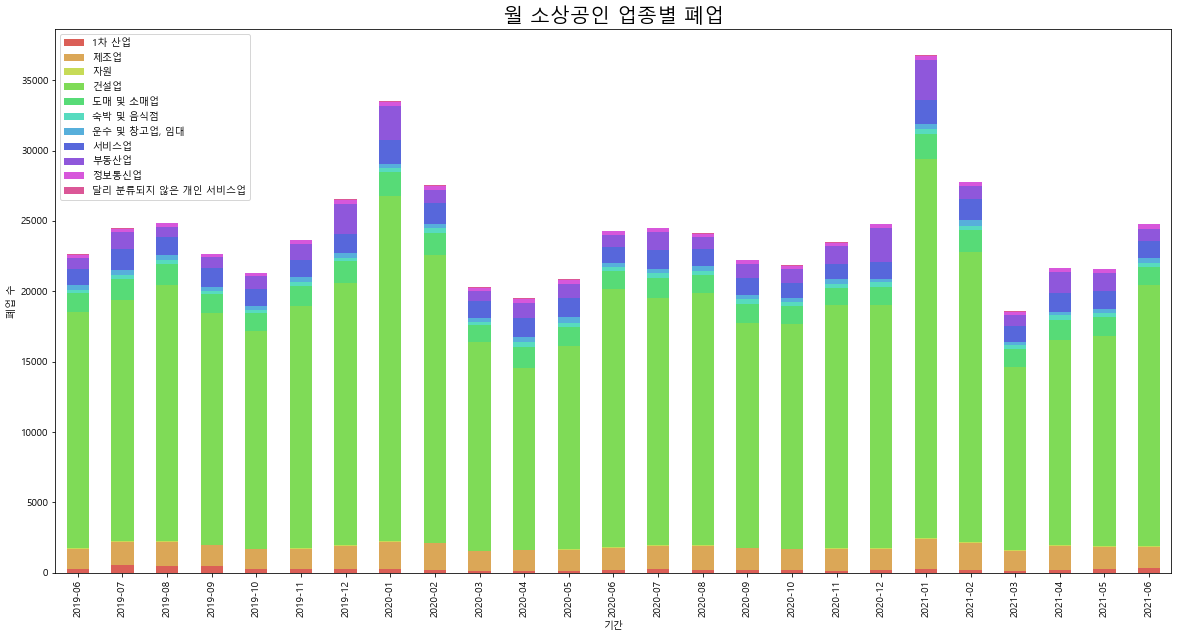

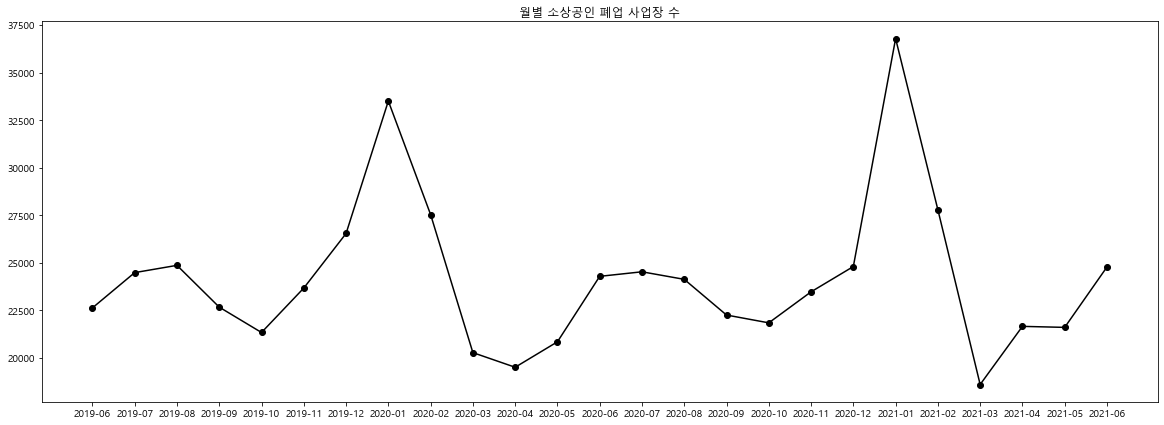

In [230]:
#누적막대 그래프

#색상지정

colors = sns.color_palette('hls',len(close_dict_total.columns))
close_dict_total[['1차 산업', '제조업', '자원', '건설업', '도매 및 소매업', '숙박 및 음식점', '운수 및 창고업, 임대',
       '서비스업', '부동산업', '정보통신업', '달리 분류되지 않은 개인 서비스업']].plot(kind='bar', stacked=True, color=colors, figsize=(20,10))
plt.title('월 소상공인 업종별 폐업', size=20)
plt.xlabel('기간')
plt.ylabel('폐업 수')
#plt.figure(figsize=(50,20))

plt.figure(figsize=(20,7))
plt.title('월별 소상공인 폐업 사업장 수')
plt.plot(new_df['months'], new_df['total'], color='black', marker='o')
plt.show()

In [ ]:
#19년 20년 기준
#https://www.yna.co.kr/view/AKR20210119149800030


In [216]:
new_df.iloc[:,[0]]

,months
0,2019-06
1,2019-07
2,2019-08
3,2019-09
4,2019-10
5,2019-11
6,2019-12
7,2020-01
8,2020-02
9,2020-03


In [219]:
month

['2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06']

In [221]:
#인덱스 추가
new_df.index=['19_06','19_07', '19_08', '19_09', '19_10', '19_11', '19_12', '20_01', '20_02','20_03','20_04','20_05','20_06','20_07', '20_08','20_09','20_10','20_11','20_12', '21_01', '21_02', '21_03','21_04','21_05', '21_06']

([<matplotlib.axis.XTick at 0x1da286bc4c0>,
 [Text(0.0, 0, '2019-06'),
  Text(1.0, 0, '2019-07'),
  Text(2.0, 0, '2019-08'),
  Text(3.0, 0, '2019-09'),
  Text(4.0, 0, '2019-10'),
  Text(5.0, 0, '2019-11'),
  Text(6.0, 0, '2019-12'),
  Text(7.0, 0, '2020-01'),
  Text(8.0, 0, '2020-02'),
  Text(9.0, 0, '2020-03'),
  Text(10.0, 0, '2020-04'),
  Text(11.0, 0, '2020-05'),
  Text(12.0, 0, '2020-06'),
  Text(13.0, 0, '2020-07'),
  Text(14.0, 0, '2020-08'),
  Text(15.0, 0, '2020-09'),
  Text(16.0, 0, '2020-10'),
  Text(17.0, 0, '2020-11'),
  Text(18.0, 0, '2020-12'),
  Text(19.0, 0, '2021-01'),
  Text(20.0, 0, '2021-02'),
  Text(21.0, 0, '2020-03'),
  Text(22.0, 0, '2020-04'),
  Text(23.0, 0, '2020-05'),
  Text(24.0, 0, '2021-06')])

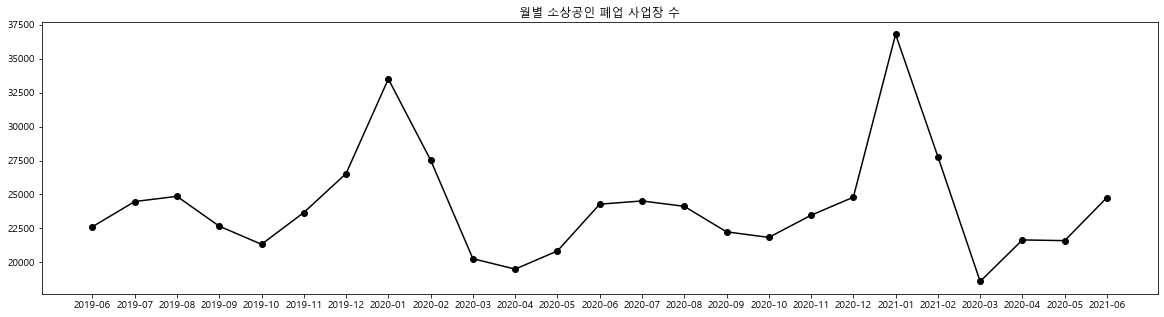

In [225]:
#선 그래프
plt.figure(figsize=(20,5))
plt.title('월별 소상공인 폐업 사업장 수')
plt.plot(new_df['months'], new_df['total'], color='black', marker='o')
#plt.plot(new_df['months'],new_df['total'], marker='^')
#plt.xlabel(['1'])
#plt.ylabel('확진자 수')

plt.xticks(month, values)
#plt.axhline(y= df1['신규_확진자_수'].mean(), linestyle='--', color='black', label=" 신규 확진자 수 평균")


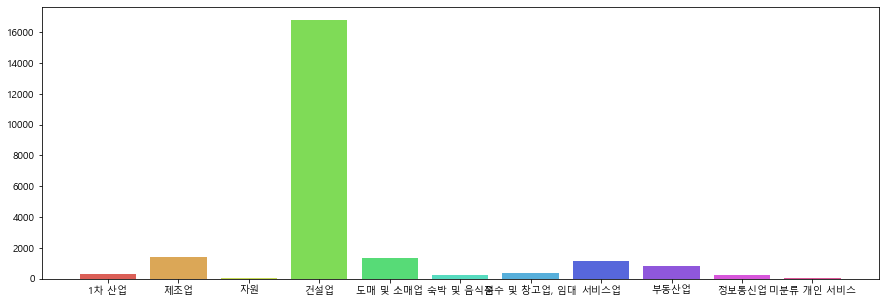

<Figure size 432x288 with 0 Axes>

In [151]:
#특정 월의 업종별 소상공인 폐업 현황

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#한글설정
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

    

plt.figure(figsize=(15,5))

#색상지정
colors = sns.color_palette('hls',len(close_dict_total.columns))

#np.arange() 함수는 주어진 범위와 간격에 따라 균일한 값을 갖는 어레이를 반환
x = np.arange(11)
jobs = ['1차 산업', '제조업', '자원', '건설업', '도매 및 소매업', '숙박 및 음식점', '운수 및 창고업, 임대',
       '서비스업', '부동산업', '정보통신업', '미분류 개인 서비스']
values = close_dict_total.loc['2019-06']

plt.bar(x, values,color=colors)
# plt.bar(x, values, color='dodgerblue')
# plt.bar(x, values, color='C2')
# plt.bar(x, values, color='#e35f62')
plt.xticks(x, jobs)

plt.show()

plt.savefig('./201907.png',dpi=20)